# Import data

In [406]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
pip install PyTDC

In [ ]:
pip install rdkit-pypi

In [409]:
from tdc.benchmark_group import admet_group
group = admet_group(path = 'data/')

benchmark = group.get('caco2_wang')

train_val, test = benchmark['train_val'], benchmark['test']

Found local copy...


In [410]:
print(train_val.shape)
train_val.head(2)

(728, 3)


,Drug_ID,Drug,Y
0,H 95/71,CC(C)NCC(O)COc1ccc(NC=O)cc1,-5.427984
1,H 244/45,CCC(=O)Nc1ccc(OCC(O)CNC(C)C)cc1,-5.219842


In [411]:
print(test.shape)
test.head(2)

(182, 3)


,Drug_ID,Drug,Y
0,I-II,O=C(O)C[C@@H](c1cnc2ccccc2c1)N1CC[C@@H](CCCc2c...,-5.69
1,aceclofenac,O=C(O)COC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl,-4.41


In [412]:
# spliting train_val set into training & validation data

from sklearn.model_selection import train_test_split as tts
x_train, x_valid, y_train, y_valid = tts(train_val.iloc[:,:-1], train_val['Y'], test_size=0.2, random_state=10)

Traning Set

In [413]:
print(x_train.shape)
x_train.head(2)

(582, 2)


,Drug_ID,Drug
142,Promethazine,CC(CN1c2ccccc2Sc2ccccc21)N(C)C
235,CA-DADLE,CC(C)C[C@H]1NC(=O)[C@@H](Cc2ccccc2)NC(=O)CNC(=...


In [414]:
print(y_train.shape)
y_train.head(2)

(582,)


142   -3.777772
235   -5.880000
Name: Y, dtype: float64

Validation Set

In [415]:
print(x_valid.shape)
x_valid.head(2)

(146, 2)


,Drug_ID,Drug
390,13g,CN1C(=O)CC(N2CCCN(CCCN3c4ccccc4COc4ccc(C(=O)O)...
143,M1,CN(C)CC1CCCCC1(O)c1cccc(O)c1


In [416]:
print(y_valid.shape)
y_valid.head(2)

(146,)


390   -5.500000
143   -4.779946
Name: Y, dtype: float64

# Features extract

In [417]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [418]:
def molecular_descriptors(table):

  descriptors = pd.DataFrame()

  mol = [Chem.MolFromSmiles(drug) for drug in table.Drug]

  # Exact molecular weight of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.ExactMolWt(i) for i in mol])
  descriptors['Exact_MW'] = Nilavo[0]

  # FpDensityMorgan1
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan1(i) for i in mol])
  descriptors['FpDensityMorgan1'] = Nilavo[0]

  # FpDensityMorgan2
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan2(i) for i in mol])
  descriptors['FpDensityMorgan2'] = Nilavo[0]

  # FpDensityMorgan3
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan3(i) for i in mol])
  descriptors['FpDensityMorgan3'] = Nilavo[0]

  # Average molecular weight of the molecule ignoring hydrogens
  Nilavo = []
  Nilavo.append([Descriptors.HeavyAtomMolWt(i) for i in mol])
  descriptors['HeavyAtomMolWt'] = Nilavo[0]

  # MaxAbsPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MaxAbsPartialCharge(i) for i in mol])
  descriptors['MaxAbsPartialCharge'] = Nilavo[0]

  # MaxPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MaxPartialCharge(i) for i in mol])
  descriptors['MaxPartialCharge'] = Nilavo[0]

  # MinAbsPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MinAbsPartialCharge(i) for i in mol])
  descriptors['MinAbsPartialCharge'] = Nilavo[0]

  # MinPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MinPartialCharge(i) for i in mol])
  descriptors['MinPartialCharge'] = Nilavo[0]

  # Average molecular weight of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.MolWt(i) for i in mol])
  descriptors['MolWt'] = Nilavo[0]

  # Number of radical electrons of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.NumRadicalElectrons(i) for i in mol])
  descriptors['NumRadicalElectrons'] = Nilavo[0]

  # Number of valence electrons of the molecule
  Nilavo = []
  Nilavo.append([Descriptors.NumValenceElectrons(i) for i in mol])
  descriptors['NumValenceElectrons'] = Nilavo[0]

  # Log of partition coefficient
  Nilavo = []
  Nilavo.append([Descriptors.MolLogP(i) for i in mol])
  descriptors['Partition_Coefficient'] = Nilavo[0]


  ### Lipinski Descriptors ###
  # Fraction of C atoms that are SP3 hybridized
  Nilavo = []
  Nilavo.append([Lipinski.FractionCSP3(i) for i in mol])
  descriptors['FractionCSP3'] = Nilavo[0]

  # Number of heavy atoms a molecule
  Nilavo = []
  Nilavo.append([Lipinski.HeavyAtomCount(i) for i in mol])
  descriptors['Heavy_atoms'] = Nilavo[0]

  # Number of NHs or OHs
  Nilavo = []
  Nilavo.append([Lipinski.NHOHCount(i) for i in mol])
  descriptors['NHs/OHs'] = Nilavo[0]

  # Number of Nitrogens and Oxygens
  Nilavo = []
  Nilavo.append([Lipinski.NOCount(i) for i in mol])
  descriptors['N&O'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) carbocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticCarbocycles(i) for i in mol])
  descriptors['Aliphatic_carbocycles'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticHeterocycles(i) for i in mol])
  descriptors['Aliphatic_heterocycles'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticRings(i) for i in mol])
  descriptors['Aliphatic_rings'] = Nilavo[0]

  # Nmber of aromatic carbocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAromaticCarbocycles(i) for i in mol])
  descriptors['Aromatic_carbocycles'] = Nilavo[0]

  # Number of aromatic heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAromaticHeterocycles(i) for i in mol])
  descriptors['Aromatic_heterocycles'] = Nilavo[0]

  # Number of aromatic rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAromaticRings(i) for i in mol])
  descriptors['Aromatic_rings'] = Nilavo[0]

  # Number of Hydrogen Bond Acceptors
  Nilavo = []
  Nilavo.append([Lipinski.NumHAcceptors(i) for i in mol])
  descriptors['HAcceptors'] = Nilavo[0]

  # Number of Hydrogen Bond Donors
  Nilavo = []
  Nilavo.append([Lipinski.NumHDonors(i) for i in mol])
  descriptors['HDonors'] = Nilavo[0]

  # Number of Heteroatoms
  Nilavo = []
  Nilavo.append([Lipinski.NumHeteroatoms(i) for i in mol])
  descriptors['Heteroatoms'] = Nilavo[0]

  # Number of Rotatable Bonds
  Nilavo = []
  Nilavo.append([Lipinski.NumRotatableBonds(i) for i in mol])
  descriptors['Rotatable_Bonds'] = Nilavo[0]

  # Number of saturated carbocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedCarbocycles(i) for i in mol])
  descriptors['Saturated_Carbocycles'] = Nilavo[0]

  # Number of saturated heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedHeterocycles(i) for i in mol])
  descriptors['Saturated_Heterocycles'] = Nilavo[0]

  # Number of saturated rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedRings(i) for i in mol])
  descriptors['Saturated_Rings'] = Nilavo[0]

  # Number of rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.RingCount(i) for i in mol])
  descriptors['Rings'] = Nilavo[0]

  return descriptors

In [419]:
# features extraction of traning set
x_train = molecular_descriptors(x_train)
print(x_train.shape)
x_train.head(2)

(582, 31)


,Exact_MW,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HeavyAtomMolWt,MaxAbsPartialCharge,MaxPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,...,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Carbocycles,Saturated_Heterocycles,Saturated_Rings,Rings
0,284.134720,0.950000,1.450000,1.950000,264.268,0.338065,0.055290,0.055290,-0.338065,284.428,...,0,2,3,0,3,3,0,0,0,3
1,697.311163,0.686275,1.294118,1.980392,654.445,0.507967,0.333557,0.333557,-0.507967,697.789,...,0,3,8,6,13,6,0,0,0,4


In [420]:
# feature extraction of validation set 
x_valid = molecular_descriptors(x_valid)
print(x_valid.shape)
x_valid.head(2)

(146, 31)


,Exact_MW,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,HeavyAtomMolWt,MaxAbsPartialCharge,MaxPartialCharge,MinAbsPartialCharge,MinPartialCharge,MolWt,...,Aromatic_heterocycles,Aromatic_rings,HAcceptors,HDonors,Heteroatoms,Rotatable_Bonds,Saturated_Carbocycles,Saturated_Heterocycles,Saturated_Rings,Rings
0,521.263819,1.000000,1.815789,2.631579,486.338,0.486639,0.335262,0.335262,-0.486639,521.618,...,0,2,7,1,10,6,0,2,2,5
1,249.172879,1.333333,2.111111,2.777778,226.170,0.507954,0.115459,0.115459,-0.507954,249.354,...,0,1,3,2,3,3,1,0,1,2


In [421]:
# Check correlation between each feature column and target column(Y)
corr = []
for col in x_train.columns:
  corr.append(x_train[col].corr(y_train))

In [422]:
corr = pd.Series(corr, index= x_train.columns)
corr.sort_values(ascending=False, inplace=True)
corr

MinPartialCharge          0.069712
Saturated_Heterocycles    0.051305
Partition_Coefficient     0.050273
FractionCSP3              0.035322
Aliphatic_rings           0.032261
Saturated_Rings           0.029886
Rings                     0.024586
Aliphatic_heterocycles    0.024002
Aliphatic_carbocycles     0.022392
Heavy_atoms               0.010245
Aromatic_carbocycles      0.008940
NumValenceElectrons       0.008469
FpDensityMorgan3          0.008430
Exact_MW                  0.004264
MolWt                     0.004240
HeavyAtomMolWt            0.002143
Aromatic_rings           -0.005470
Saturated_Carbocycles    -0.008126
FpDensityMorgan2         -0.011875
Aromatic_heterocycles    -0.019246
FpDensityMorgan1         -0.023507
HDonors                  -0.024824
N&O                      -0.027703
Heteroatoms              -0.031337
MaxPartialCharge         -0.031677
Rotatable_Bonds          -0.032233
MinAbsPartialCharge      -0.037262
NHs/OHs                  -0.037289
HAcceptors          

In [423]:
# Drop less-informative features

x_train.drop(columns=['NumRadicalElectrons', 'Aromatic_carbocycles', 'NumValenceElectrons', 'FpDensityMorgan3', 'Exact_MW', 'MolWt', 'HeavyAtomMolWt', 'Aromatic_rings', 'Saturated_Carbocycles'], inplace = True)
x_valid.drop(columns=['NumRadicalElectrons', 'Aromatic_carbocycles', 'NumValenceElectrons', 'FpDensityMorgan3', 'Exact_MW', 'MolWt', 'HeavyAtomMolWt', 'Aromatic_rings', 'Saturated_Carbocycles'], inplace = True)

In [424]:
print(x_train.shape)
print(x_valid.shape)

(582, 22)
(146, 22)


# Build ML model

In [425]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor

from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_absolute_error as mae

In [426]:
lin = LinearRegression()
knn = KNeighborsRegressor()
svr = SVR()
tree = DecisionTreeRegressor(random_state=0)
bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), random_state=0)
forest = RandomForestRegressor(random_state=0)
et = ExtraTreesRegressor(random_state=0)
grad = GradientBoostingRegressor(random_state=0)
ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0),random_state=0)

In [427]:
MAE = []
R2 = []
for i in (lin, knn, svr, tree, bag, forest, et, grad, ada):
  i.fit(x_train, y_train)
  y_valid_pred = i.predict(x_valid)
  
  R2.append(r2(y_valid, y_valid_pred))
  MAE.append(mae(y_valid, y_valid_pred))

In [428]:
R2

[0.4650294558503345,
 0.5999106528707694,
 0.5783950548615845,
 0.41365344779098867,
 0.6930089404095442,
 0.7342879278396562,
 0.7093771968606902,
 0.7012754075964083,
 0.7347059385172129]

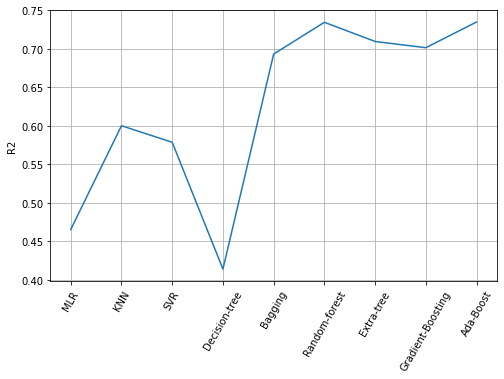

In [429]:
pd.Series(R2, index=('MLR', 'KNN', 'SVR', 'Decision-tree', 'Bagging', 'Random-forest', 'Extra-tree', 'Gradient-Boosting', 'Ada-Boost')).plot(grid=True, figsize=(8,5))
plt.xticks(rotation = 60)
plt.ylabel('R2')
plt.show()

In [430]:
MAE

[0.4258110854060971,
 0.36473333890410964,
 0.3949327503343581,
 0.43540283287671233,
 0.31730455009116115,
 0.3047280650647914,
 0.31050218601027396,
 0.3287537938615003,
 0.31025942084329156]

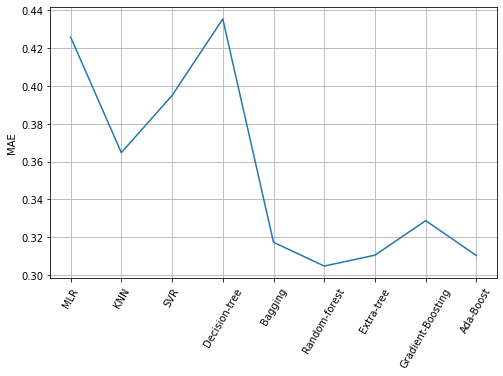

In [431]:
pd.Series(MAE, index=('MLR', 'KNN', 'SVR', 'Decision-tree', 'Bagging', 'Random-forest', 'Extra-tree', 'Gradient-Boosting', 'Ada-Boost')).plot(grid=True, figsize=(8,5))
plt.xticks(rotation = 60)
plt.ylabel('MAE')
plt.show()

I can easily see, Bagging, Random-forest, Extra-tree, Gradient-Boosting and Ada-Boost this 5 models gives best statistical results. So, I will try to tune parameters of this models to get better results.

## Bagging parameter tuning

In [432]:
e = []
for i in np.arange(50,500,50):   
  bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), random_state=0, n_estimators = i)
  bag.fit(x_train, y_train)
  y_valid_pred = bag.predict(x_valid)

  e.append(r2(y_valid, y_valid_pred))

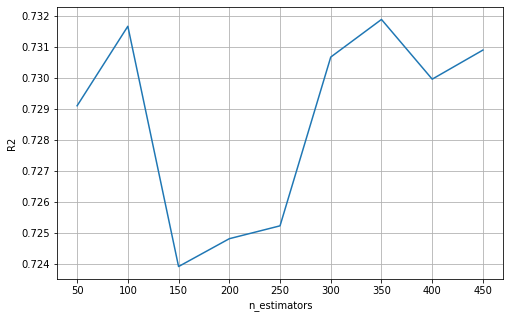

In [433]:
pd.Series(e, index=np.arange(50,500,50)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('R2')
plt.show()

In [434]:
# highest r2_score at n_estimators=350
bag = BaggingRegressor(DecisionTreeRegressor(random_state=0), n_estimators = 350, random_state=0)

bag.fit(x_train, y_train)
y_valid_pred = bag.predict(x_valid)

print('R2 :', r2(y_valid, y_valid_pred))
print('MAE :', mae(y_valid, y_valid_pred))

R2 : 0.7318806990406433
MAE : 0.30791334073100335


## Random-forest parameter tuning

In [435]:
e = []
for i in np.arange(50,500,50):   
  rf = RandomForestRegressor(random_state=0, n_estimators = i)
  rf.fit(x_train, y_train)
  y_valid_pred = rf.predict(x_valid)

  e.append(r2(y_valid, y_valid_pred))

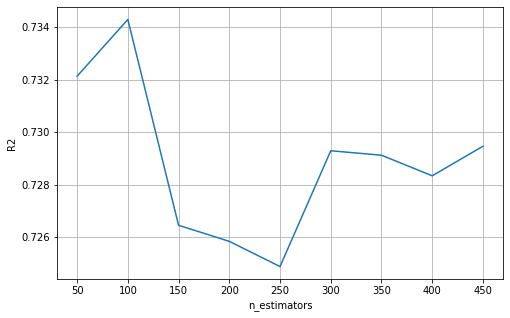

In [436]:
pd.Series(e, index=np.arange(50,500,50)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('R2')
plt.show()

In [437]:
# highest r2_score at n_estimators=100
rf = RandomForestRegressor(n_estimators = 100, random_state=0)

rf.fit(x_train, y_train)
y_valid_pred = rf.predict(x_valid)

print('R2 :', r2(y_valid, y_valid_pred))
print('MAE :', mae(y_valid, y_valid_pred))

R2 : 0.7342879278396562
MAE : 0.3047280650647914


##Extra-tree parameter tuning

In [438]:
e = []
for i in np.arange(50,500,50):   
  et = ExtraTreesRegressor(random_state=0, n_estimators = i)
  et.fit(x_train, y_train)
  y_valid_pred = et.predict(x_valid)

  e.append(r2(y_valid, y_valid_pred))

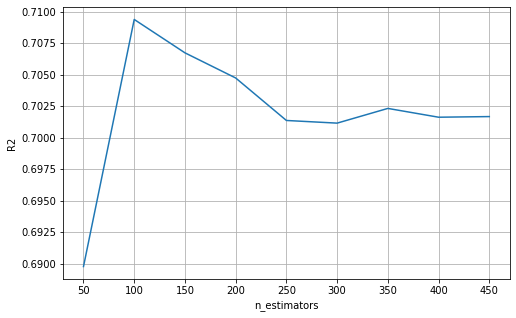

In [439]:
pd.Series(e, index=np.arange(50,500,50)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators')
plt.ylabel('R2')
plt.show()

In [440]:
# highest r2_score at n_estimators=100
et = ExtraTreesRegressor(random_state=0, n_estimators = 100)

et.fit(x_train, y_train)
y_valid_pred = et.predict(x_valid)

print('R2 :', r2(y_valid, y_valid_pred))
print('MAE :', mae(y_valid, y_valid_pred))

R2 : 0.7093771968606902
MAE : 0.31050218601027396


##Gradient-Boosting parameter tuning

In [441]:
e = []
for i in np.arange(50,500,50):
  for j in np.arange(0.1, 0.5, 0.1):   
    grad = GradientBoostingRegressor(random_state=0, n_estimators = i, learning_rate = j)
    grad.fit(x_train, y_train)
    y_valid_pred = grad.predict(x_valid)

    e.append(r2(y_valid, y_valid_pred))

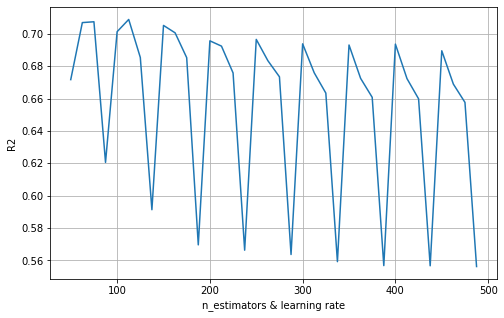

In [442]:
pd.Series(e, index=np.arange(50,500,50/4)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators & learning rate')
plt.ylabel('R2')
plt.show()

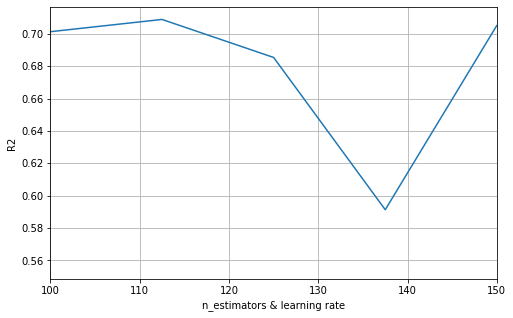

In [443]:
# zooming on n_estimators=100 & learning_rate varies from 0.1 to 0.4

pd.Series(e, index=np.arange(50,500,50/4)).plot(grid= True, figsize=(8,5))
plt.xlim([100, 150])
plt.xlabel('n_estimators & learning rate')
plt.ylabel('R2')
plt.show()

In [444]:
# highest r2_score at n_estimators=100 & learning_rate=0.2
grad = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.2, random_state=0)

grad.fit(x_train, y_train)
y_valid_pred = grad.predict(x_valid)

print('R2 :', r2(y_valid, y_valid_pred))
print('MAE :', mae(y_valid, y_valid_pred))

R2 : 0.7088304624644101
MAE : 0.3128625489283682


##Ada-Boost parameter tuning

In [445]:
e = []
for i in np.arange(50,500,50):
  for j in np.arange(0.1, 0.5, 0.1): 
    ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), random_state=0, n_estimators = i, learning_rate = j)
    ada.fit(x_train, y_train)
    y_valid_pred = ada.predict(x_valid)

    e.append(r2(y_valid, y_valid_pred))

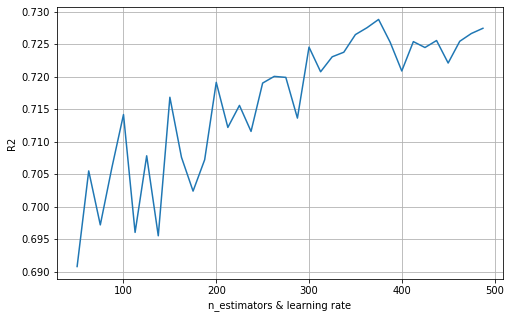

In [446]:
pd.Series(e, index=np.arange(50,500,50/4)).plot(grid= True, figsize=(8,5))
plt.xlabel('n_estimators & learning rate')
plt.ylabel('R2')
plt.show()

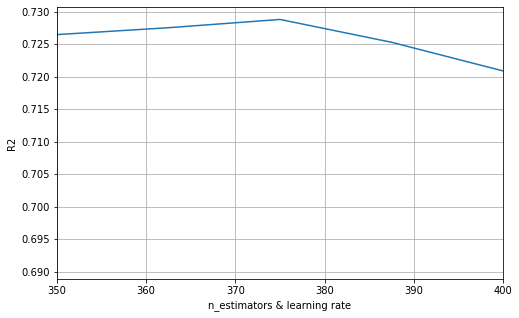

In [447]:
# zooming on n_estimators=350 & learning_rate varies from 0.1 to 0.4

pd.Series(e, index=np.arange(50,500,50/4)).plot(grid= True, figsize=(8,5))
plt.xlim([350, 400])
plt.xlabel('n_estimators & learning rate')
plt.ylabel('R2')
plt.show()

In [448]:
# highest r2_score at n_estimators=350 & learning_rate=0.3
ada = AdaBoostRegressor(DecisionTreeRegressor(random_state=0), random_state=0, n_estimators = 350, learning_rate = 0.3)

ada.fit(x_train, y_train)
y_valid_pred = ada.predict(x_valid)

print('R2 :', r2(y_valid, y_valid_pred))
print('MAE :', mae(y_valid, y_valid_pred))

R2 : 0.7288049089741953
MAE : 0.3071825182231295


## Results after tuning

In [449]:
##  MAE      R2      Model

# 0.3079    0.7318    bag
# 0.3047    0.7342    rf
# 0.3105    0.7093    et
# 0.3128    0.7088    grad
# 0.3071    0.7288    ada

Here, Random-Forest model with n_estimator=100 gives highest r2_score, lowest MAE on the validation set.

So, I will save this model and make prediction on test set using this model.

In [450]:
# save best model
import pickle

pickle.dump(rf,open('Nilavo.pkl','wb'))

# Using my Best Model to predict on the test set
As instructed in TDC Leaderboard Guidelines: https://tdcommons.ai/benchmark/overview/

In [451]:
# Importent features extractor function

def useful_molecular_descriptors(table):

  descriptors = pd.DataFrame()

  mol = [Chem.MolFromSmiles(drug) for drug in table.Drug]

  # FpDensityMorgan1
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan1(i) for i in mol])
  descriptors['FpDensityMorgan1'] = Nilavo[0]

  # FpDensityMorgan2
  Nilavo = []
  Nilavo.append([Descriptors.FpDensityMorgan2(i) for i in mol])
  descriptors['FpDensityMorgan2'] = Nilavo[0]

  # MaxAbsPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MaxAbsPartialCharge(i) for i in mol])
  descriptors['MaxAbsPartialCharge'] = Nilavo[0]

  # MaxPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MaxPartialCharge(i) for i in mol])
  descriptors['MaxPartialCharge'] = Nilavo[0]

  # MinAbsPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MinAbsPartialCharge(i) for i in mol])
  descriptors['MinAbsPartialCharge'] = Nilavo[0]

  # MinPartialCharge
  Nilavo = []
  Nilavo.append([Descriptors.MinPartialCharge(i) for i in mol])
  descriptors['MinPartialCharge'] = Nilavo[0]

  # Log of partition coefficient
  Nilavo = []
  Nilavo.append([Descriptors.MolLogP(i) for i in mol])
  descriptors['Partition_Coefficient'] = Nilavo[0]


  ### Lipinski Descriptors ###
  # Fraction of C atoms that are SP3 hybridized
  Nilavo = []
  Nilavo.append([Lipinski.FractionCSP3(i) for i in mol])
  descriptors['FractionCSP3'] = Nilavo[0]

  # Number of heavy atoms a molecule
  Nilavo = []
  Nilavo.append([Lipinski.HeavyAtomCount(i) for i in mol])
  descriptors['Heavy_atoms'] = Nilavo[0]

  # Number of NHs or OHs
  Nilavo = []
  Nilavo.append([Lipinski.NHOHCount(i) for i in mol])
  descriptors['NHs/OHs'] = Nilavo[0]

  # Number of Nitrogens and Oxygens
  Nilavo = []
  Nilavo.append([Lipinski.NOCount(i) for i in mol])
  descriptors['N&O'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) carbocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticCarbocycles(i) for i in mol])
  descriptors['Aliphatic_carbocycles'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticHeterocycles(i) for i in mol])
  descriptors['Aliphatic_heterocycles'] = Nilavo[0]

  # Number of aliphatic (containing at least one non-aromatic bond) rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAliphaticRings(i) for i in mol])
  descriptors['Aliphatic_rings'] = Nilavo[0]

  # Number of aromatic heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumAromaticHeterocycles(i) for i in mol])
  descriptors['Aromatic_heterocycles'] = Nilavo[0]

  # Number of Hydrogen Bond Acceptors
  Nilavo = []
  Nilavo.append([Lipinski.NumHAcceptors(i) for i in mol])
  descriptors['HAcceptors'] = Nilavo[0]

  # Number of Hydrogen Bond Donors
  Nilavo = []
  Nilavo.append([Lipinski.NumHDonors(i) for i in mol])
  descriptors['HDonors'] = Nilavo[0]

  # Number of Heteroatoms
  Nilavo = []
  Nilavo.append([Lipinski.NumHeteroatoms(i) for i in mol])
  descriptors['Heteroatoms'] = Nilavo[0]

  # Number of Rotatable Bonds
  Nilavo = []
  Nilavo.append([Lipinski.NumRotatableBonds(i) for i in mol])
  descriptors['Rotatable_Bonds'] = Nilavo[0]

  # Number of saturated heterocycles for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedHeterocycles(i) for i in mol])
  descriptors['Saturated_Heterocycles'] = Nilavo[0]

  # Number of saturated rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.NumSaturatedRings(i) for i in mol])
  descriptors['Saturated_Rings'] = Nilavo[0]

  # Number of rings for a molecule
  Nilavo = []
  Nilavo.append([Lipinski.RingCount(i) for i in mol])
  descriptors['Rings'] = Nilavo[0]

  return descriptors

In [452]:
from tdc.benchmark_group import admet_group
group = admet_group(path = 'data/')
predictions_list = []

for seed in [1, 2, 3, 4, 5]:
  benchmark = group.get('Caco2_Wang') 
  # all benchmark names in a benchmark group are stored in group.dataset_names
  predictions = {}
  name = benchmark['name']
  train_val, test = benchmark['train_val'], benchmark['test']
  train, valid = group.get_train_valid_split(benchmark = name, split_type = 'default', seed = seed)
  
  # features extraction
  train_x = useful_molecular_descriptors(train)
  valid_x = useful_molecular_descriptors(valid)
  test_x = useful_molecular_descriptors(test)

  # target column
  y_train = train.Y
  y_valid = valid.Y
  y_test = test.Y

  # merging traning and validation set
  x_train = pd.concat([train_x, valid_x])
  y_train = pd.concat([y_train, y_valid], axis=0)

  # loading saved model
  model = pickle.load(open('Nilavo.pkl','rb'))
  # train saved model on train & validation set
  model.fit(x_train, y_train)
  # prediction on test set
  y_pred_test = model.predict(test_x)

  predictions[name] = y_pred_test
  predictions_list.append(predictions)

results = group.evaluate_many(predictions_list)

Found local copy...
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2074.96it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 1980.06it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2053.07it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2265.67it/s]
generating training, validation splits...
100%|██████████| 728/728 [00:00<00:00, 2085.21it/s]


In [453]:
results

{'caco2_wang': [0.343, 0.005]}